# Proyecto final Bedu: Machine Learning aplicado a vehículos usados.

## Introducción

En este notebook trabajaremos con datasets de autos usados, donde usaremos métodos de Machine Learning de agrupación y predicción. La variable a predecir será el precio del auto.

Empezamos importando las librerías necesarias y los datasets necesarios para juntarlos en uno solo.

In [1]:
import pandas as pd
import numpy as np
import MLUtilities as utils

In [2]:
import os
import glob

# Directorio actual
# '/Users/Casa/Machine Learning/ProyectoML/Autos'
mydir = os.getcwd()

# Definimos los delimitadores de archivo
start = mydir+"\\Autos\\"
end = '.csv'

# Con * buscamos todos los nombres de archivo de valores
cars = glob.glob(start+'*'+end)

# Definimos el nombre de columnas del primer CSV para no tener problemas en la concatenación
col_names = pd.read_csv(cars[1]).columns

df_list = []
for filename in sorted(cars):
    file = pd.read_csv(filename, skiprows = [0], names=col_names, header=None) #Saltar la columna de cabecera
    company_name = filename[len(start):-len(end)] # A partir del directorio del archivo extraemos el nombre
    file['company'] = company_name.capitalize()
    df_list.append(file)

df = pd.concat(df_list)

df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,Vw
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,Vw
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,Vw
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,Vw


Vamos a explorar nuestros datos y ver si están limpios. Además veremos si hay valores atípicos y como lidiar con ellos.

In [3]:
df.isna().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax                0
mpg             9353
engineSize      9353
company            0
dtype: int64

In [4]:
# Eliminaremos los 9353 NaNs
df.dropna(how='any', inplace=True)
df.reset_index(inplace=True, drop=True )
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
99182,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,Vw
99183,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,Vw
99184,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,Vw
99185,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,Vw


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


Por un lado el año máximo dice **2060**, pero no tiene sentido dado que estamos en 2021. Cambiemos el *2060* por **2006**. Además la variable engineSize muestra un mínimo de cero, pero no tiene sentido ya que nuestros autos usan todos gasolina. Vamos a revisar un poco más.

In [6]:
df['year'].replace({2060:2006}, inplace = True )

Sólo tenemos dos datos de años anteriores a 1990, por lo que no nos interesan

In [7]:
df[df['year'] < 1990]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
56346,M Class,1970,24999,Automatic,14000,Diesel,305.0,39.2,0.0,Merc
81235,Zafira,1970,10495,Manual,37357,Petrol,200.0,42.2,1.4,Vauxhall


In [8]:
df.drop([56346, 81235], inplace=True)
df.reset_index(inplace=True, drop=True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
99180,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,Vw
99181,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,Vw
99182,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,Vw
99183,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,Vw


In [9]:
df[df['engineSize']==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
7505,Q5,2019,44790,Automatic,5886,Petrol,135.0,117.7,0.0,Audi
7506,Q3,2019,32788,Automatic,1500,Diesel,145.0,47.1,0.0,Audi
7516,Q3,2020,29944,Manual,1500,Petrol,145.0,40.9,0.0,Audi
7517,Q3,2020,33333,Automatic,1500,Diesel,145.0,47.1,0.0,Audi
7518,Q3,2020,29944,Automatic,1500,Petrol,145.0,32.5,0.0,Audi
...,...,...,...,...,...,...,...,...,...,...
95676,Tiguan,2016,15300,Manual,38398,Diesel,145.0,53.3,0.0,Vw
95683,Tiguan,2018,24000,Automatic,22200,Diesel,145.0,47.9,0.0,Vw
96849,Up,2017,8500,Manual,20324,Petrol,20.0,64.2,0.0,Vw
96907,Up,2017,8000,Manual,24444,Petrol,20.0,60.1,0.0,Vw


Son 272 autos con engineSize 0. Esta información no es coherente y nos tomará mucho tiempo buscar el valor real de todos, por lo que eliminaremos estos valores para quedarnos con 98913 filas para analizar.

In [10]:
df.drop(df[df['engineSize']==0].index, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
98908,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,Vw
98909,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,Vw
98910,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,Vw
98911,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,Vw


Veamos la información del dataframe para comprobar que todo esté en orden.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         98913 non-null  object 
 1   year          98913 non-null  int64  
 2   price         98913 non-null  int64  
 3   transmission  98913 non-null  object 
 4   mileage       98913 non-null  int64  
 5   fuelType      98913 non-null  object 
 6   tax           98913 non-null  float64
 7   mpg           98913 non-null  float64
 8   engineSize    98913 non-null  float64
 9   company       98913 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.5+ MB


Visualicemos nuestros datos para ver si necesitamos más limpieza.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

Vamos a visualizar un histograma de nuestras variables, y basándonos en lo que veamos aplicaremos un filtro para quitarnos los valores atípicos.

In [12]:
df_numeric = df.select_dtypes(include='number')
lista = df_numeric.columns[1:]

<ipython-input-13-afd6dba50254>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(bins= 14, ax=ax);


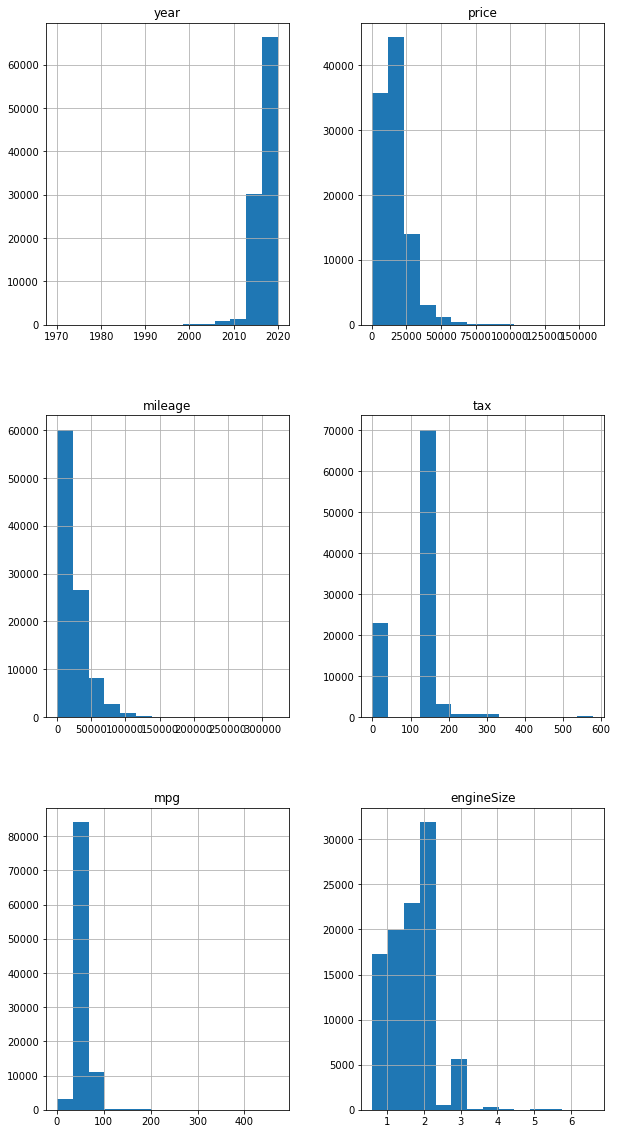

In [13]:
#bins = [25,30,30,20,47,7]

fig = plt.figure(figsize = (10,20));
ax = fig.gca();
df.hist(bins= 14, ax=ax);

Al parecer nos podemos quitar valores atípicos en la mayoría de las variables por arriba. Hágamos eso a continuación.

In [15]:
def removeOutliers(col):
    Q3 = np.quantile(col, 0.75)
    Q1 = np.quantile(col, 0.25)
    IQR = Q3 - Q1
     
    #lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 2.5 * IQR
    #list_col = list(col[col.between(lower_range, upper_range)])
    list_col = list(col[col<upper_range])
    filter_col = col.isin(list_col)
    return filter_col

Nos interesa aplicar el filtro a nuestras columnas numéricas principales

In [16]:
df_filter = df[df[['price', 'mileage', 'tax', 'mpg']].apply(lambda x: removeOutliers(x)).all(axis=1)]
df_filter = df_filter.reset_index(drop=True)
df_filter.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi
5,A1,2016,13900,Automatic,32260,Petrol,30.0,58.9,1.4,Audi
6,A6,2016,13250,Automatic,76788,Diesel,30.0,61.4,2.0,Audi
7,A4,2016,11750,Manual,75185,Diesel,20.0,70.6,2.0,Audi
8,A3,2015,10200,Manual,46112,Petrol,20.0,60.1,1.4,Audi
9,A1,2016,12000,Manual,22451,Petrol,30.0,55.4,1.4,Audi


In [17]:
def graphic_filter(original_col, filtered_col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    media_sin_filtro = original_col.mean()
    sns.boxplot(ax=axes[0], x=original_col).set_title('No filter')
    axes[0].axvline( media_sin_filtro, c='r',ls=':')

    media_con_filtro = filtered_col.mean()
    sns.boxplot(ax=axes[1], x=filtered_col).set_title('Filtered')
    axes[1].axvline(media_con_filtro, c='r',ls=':')
    
    antes = [media_sin_filtro, original_col.median(), utils.obtenerModa(original_col), original_col.std()]
    antes = np.around(list(antes),2)
    despues = [media_con_filtro, filtered_col.median(), utils.obtenerModa(filtered_col), filtered_col.std()]
    despues = np.around(list(despues),2)
    
    datos = {
    'Antes': antes,
    'Después':  despues,
    'Diferencia (%)': np.around(100*(antes-despues)/antes,2)
    }
    
    df_per = pd.DataFrame(datos)
    df_per.index = ['Media','Mediana', 'Moda', 'Desviación']
    return df_per

,Antes,Después,Diferencia (%)
Media,16804.94,16188.29,3.67
Mediana,14495.00,14290.00,1.41
Moda,9995.00,9995.00,0.00
Desviación,9867.85,8087.68,18.04


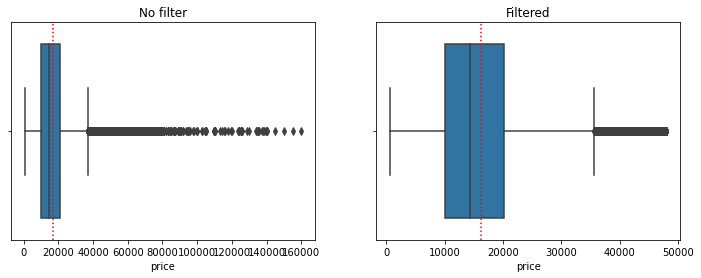

In [20]:
graphic_filter(df['price'],df_filter['price'])

,Antes,Después,Diferencia (%)
Media,23064.74,21352.82,7.42
Mediana,17456.00,16505.00,5.45
Moda,10.00,10.00,0.00
Desviación,21157.17,18268.52,13.65


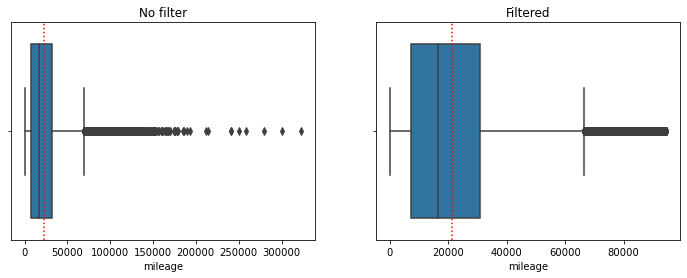

In [21]:
graphic_filter(df['mileage'],df_filter['mileage'])

,Antes,Después,Diferencia (%)
Media,120.32,113.24,5.88
Mediana,145.00,145.00,0.00
Moda,145.00,145.00,0.00
Desviación,63.12,55.01,12.85


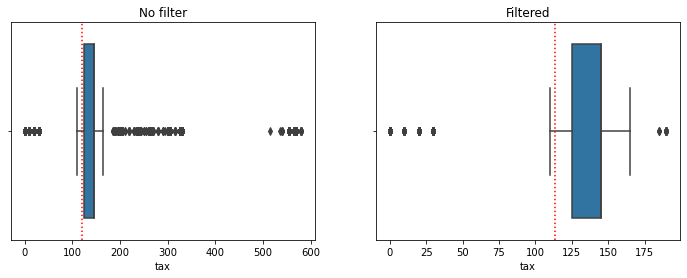

In [22]:
graphic_filter(df['tax'],df_filter['tax'])

,Antes,Después,Diferencia (%)
Media,55.02,55.57,-1.00
Mediana,54.30,55.40,-2.03
Moda,60.10,60.10,0.00
Desviación,14.10,10.77,23.62


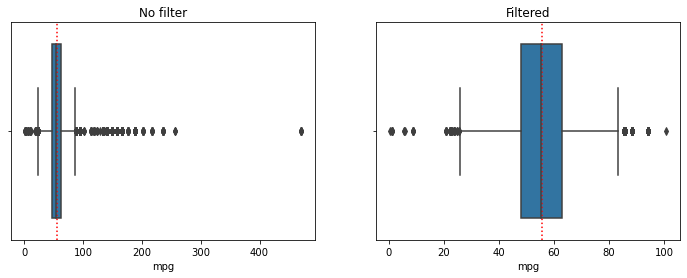

In [23]:
graphic_filter(df['mpg'],df_filter['mpg'])

Ahora con nuestros datos limpios y sin valores atípicos podemos crear un nuevo csv para empezar a trabajar.

In [24]:
df_filter.shape

(90614, 10)

In [26]:
df_filter.to_csv('/Users/Casa/Machine-Learning/ProyectoML/df_car-prices.csv')